In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from wordcloud import WordCloud
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv


In [5]:
reviews = pd.read_csv('../input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv')
reviews.head() 

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [6]:
movies = pd.read_csv('../input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')
movies.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


<Figure size 1440x1080 with 0 Axes>

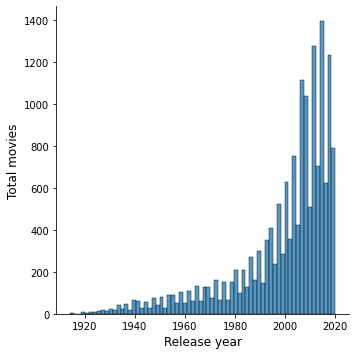

<Figure size 432x288 with 0 Axes>

In [23]:
### Movies by year 

pd.options.mode.chained_assignment = None # solution to error "A value is trying to be set on a copy of a slice from a DataFrame". 
movies01 = movies[movies.original_release_date.notnull()]
movies01.original_release_date = pd.to_datetime(movies01.original_release_date)
movies01['year'] = movies01['original_release_date'].apply(lambda x: x.year) # in this way we only have the year

# Do the plot
plt.figure(figsize=(20,15))
sns.displot(movies01.year, kde=False)
plt.ylabel('Total movies', size= 12)
plt.xlabel('Release year',size= 12)
plt.show()
plt.savefig('Years.png')

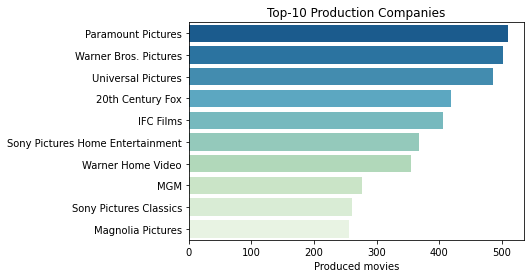

In [8]:
### Top-10 Production Companies 

# Filter the df for the plot
count_of_PC = movies01.production_company.value_counts()[:10] #We only want the top 10 for this graph

# Create the plot
sns.barplot(x = count_of_PC.values, y = count_of_PC.index, palette ='GnBu_r')
plt.title('Top-10 Production Companies')
plt.xlabel('Produced movies')
plt.savefig('ProductionCo.png')

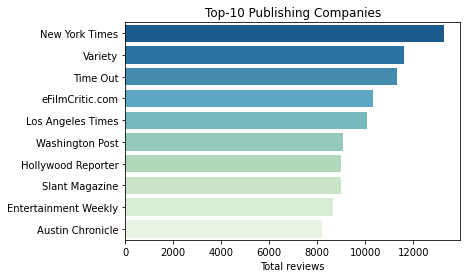

In [9]:
### Top-10 Publisher Names

# Filter the df for the plot
count_of_PN = reviews['publisher_name'].value_counts()[:10]

# Create the plot
sns.barplot(x = count_of_PN.values, y = count_of_PN.index, palette = 'GnBu_r' )
plt.title("Top-10 Publishing Companies")
plt.xlabel("Total reviews")
plt.savefig('publishers.png')

In [10]:
movies['genre'] = movies['genres'].str.split(',')

movies_split = movies.explode("genre")
movies_split.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Action & Adventure
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Comedy


In [11]:
### Rating Fix

movies['first_genre'] = movies['genres'].str.split(',').str[0]
def cleaning_review_scores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0
review_ok = reviews[(reviews.review_score.notnull()) & (reviews.review_score.str.isnumeric() == False)]
review_ok['review_score'] = review_ok['review_score'].apply(cleaning_review_scores)

review_ok['review_score'] = pd.to_numeric(review_ok['review_score'], errors='coerce')
review_ok = review_ok[(review_ok.review_score.notnull()) & (review_ok.review_content.notnull())]
review_ok['review_date'] = pd.to_datetime(review_ok['review_date'])
review_ok['review_year'] = review_ok['review_date'].apply(lambda x: x.year)

review_ok.insert(1, 'first_genre', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['first_genre']))
review_ok.insert(1, 'genres', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['genres']))
review_ok.insert(1, 'movie_title', review_ok['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['movie_title']))
review_ok.head(2)

,rotten_tomatoes_link,movie_title,genres,first_genre,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_year
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Ben McEachen,False,Sunday Mail (Australia),Fresh,7.0,2010-02-09,Whether audiences will get behind The Lightnin...,2010
6,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Action & Adventure,Nick Schager,False,Slant Magazine,Rotten,2.5,2010-02-10,Harry Potter knockoffs don't come more transpa...,2010


In [12]:
genre_AVG = pd.pivot_table(movies_split, values = {'tomatometer_rating','audience_rating'}, index = 'genre', aggfunc='mean')
genre_AVG = genre_AVG.reset_index()
genre_AVG

,genre,audience_rating,tomatometer_rating
0,Animation,66.678715,64.400000
1,Anime & Manga,75.000000,75.368421
2,Art House & International,64.371849,67.589099
3,Classics,69.713755,76.865922
4,Comedy,63.240330,61.928058
5,Cult Movies,59.219512,63.573171
6,Documentary,68.430723,77.208211
7,Drama,64.889336,65.517241
8,Faith & Spirituality,70.341772,63.886076
9,Gay & Lesbian,61.486842,57.410256


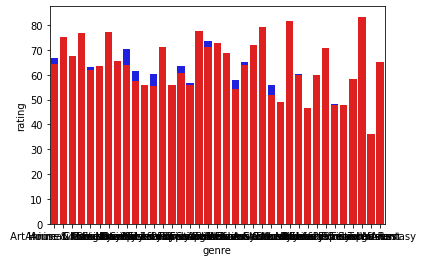

<Figure size 432x288 with 0 Axes>

In [13]:
ax = plt.subplots()
ax = sns.barplot(x = genre_AVG['genre'], y= genre_AVG['audience_rating'],data = genre_AVG, color = 'blue')
ax = sns.barplot(x = genre_AVG['genre'], y= genre_AVG['tomatometer_rating'],data = genre_AVG, color = 'red')
ax.set(xlabel="genre", ylabel="rating")
plt.show()
plt.savefig('GenrexRating_all.png')

In [14]:
### Pivot Table Genre vs Rating
genre_avgRating = pd.pivot_table(review_ok, values='review_score', index='first_genre',
                    aggfunc='mean')
genre_avgRating

,review_score
first_genre,
Action & Adventure,6.147165
Animation,6.809342
Art House & International,7.050506
Classics,7.821245
Comedy,6.013268
Cult Movies,6.450540
Documentary,7.321117
Drama,6.635031
Horror,5.605507


In [15]:
### Pivot Table Genre vs Rating
genre_avgRating01 = pd.pivot_table(review_ok, values='review_score', index='rotten_tomatoes_link',
                    aggfunc='mean')
genre_avgRating01.sort_values('review_score', ascending = False)

,review_score
rotten_tomatoes_link,
m/strike1924,10.0
m/nijinsky,10.0
m/richard_pryor_live_in_concert,10.0
m/1045328-gypsy,10.0
m/my_fathers_glory,10.0
...,...
m/police_academy_6_city_under_siege,0.0
m/iron_eagle,0.0
m/frogs_for_snakes,0.0


In [16]:
review_ok.review_score.describe()

count    757072.000000
mean          6.402355
std           2.127447
min           0.000000
25%           5.000000
50%           6.250000
75%           8.000000
max          10.000000
Name: review_score, dtype: float64

In [17]:
### Getting all movies with avg rating = 10.0 -> there are 19 movies with 10.00 avg rating
genre_avgRating01.loc[(genre_avgRating01['review_score'] == 10.0)].count()
genre_avgRating01.loc[(genre_avgRating01['review_score'] == 10.0)]

,review_score
rotten_tomatoes_link,
m/1045328-gypsy,10.0
m/almayers_folly_2012,10.0
m/beautiful_something,10.0
m/disappearing_acts,10.0
m/harakiri,10.0
m/john_mulaney_the_comeback_kid,10.0
m/last_voyage,10.0
m/lion_of_the_desert,10.0
m/meeting_people_is_easy_1999,10.0


In [18]:
review_ok.rotten_tomatoes_link.value_counts().describe() 

count    17624.000000
mean        42.956877
std         60.370868
min          1.000000
25%          6.000000
50%         17.000000
75%         54.000000
max        670.000000
Name: rotten_tomatoes_link, dtype: float64

In [19]:
genre_avgRating02 = pd.pivot_table(movies, values=['tomatometer_rating','tomatometer_count'], index=['rotten_tomatoes_link','movie_title'])
top_movies = genre_avgRating02.sort_values(['tomatometer_rating', 'tomatometer_count'], ascending = False).head(10)
top_movies


,,tomatometer_count,tomatometer_rating
rotten_tomatoes_link,movie_title,,
m/paddington_2,Paddington 2,242.0,100.0
m/leave_no_trace,Leave No Trace,234.0,100.0
m/toy_story_2,Toy Story 2,169.0,100.0
m/man_on_wire,Man on Wire,158.0,100.0
m/citizen_kane,Citizen Kane,93.0,100.0
m/taxi_to_the_dark_side,Taxi to the Dark Side,93.0,100.0
m/toy_story,Toy Story,90.0,100.0
m/crip_camp_a_disability_revolution,Crip Camp: A Disability Revolution,84.0,100.0
m/gett_the_trial_of_viviane_amsalem,GETT: The Trial of Viviane Amsalem,78.0,100.0


In [20]:
# #WordCloud for Genres
# import nltk
# import spacy
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
# from string import punctuation
# import re

# reviewsxgenre = list(review_ok.groupby('first_genre')['review_content'])  #reviewsxgenre[0:1]
# #print(list(review_ok.groupby('first_genre')['review_content']))

# t1=''.join([str(x) for x in reviewsxgenre]) 
# #t1

# tokenizer = nltk.RegexpTokenizer(r"\w+")
# nopunc = tokenizer.tokenize(t1)
# t1bis=" ".join(nopunc)
# t1bis= nltk.word_tokenize(t1bis.lower())

# #Delete all numbers from string
# # t1bis0 = str(t1bis)
# x1 = re.findall("[0-9]+",t1bis0)
# # #print(type(x1))

# # stop_words = set(stopwords.words('english'))
# # stop_words |= set(x1) #add the list with all the numbers in the string to the list of stopwords
# # stop_words.update({'n', 'name', 'review_conten','length', 'dtype', 'object'})
# words = t1bis

# review_content_no_number = [w for w in t1bis if not w in stop_words]
# #print(review_content_no_number)

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation

text = 'Hola, como estas 19845'
def clean_text (text):
    text = text.lower()
    text = re.sub(r"\b[0-9]+\b\s*","",text) #re.sub(r"\b[0-9]+\b\s*","",text) re.findall(r"\[a-zA-Z]+",text)
    #text = " ".join(text.split())
#     tokenizer = nltk.RegexpTokenizer(r"\w+")
#     nopunc = tokenizer.tokenize(text)
#     text= nltk.word_tokenize
    

In [22]:
select_genre = str(input('Type :'))
text01 = list(review_ok[review_ok['first_genre'] == select_genre]['review_content']) #'''Hola, como estas 19845''' groupby(['first_genre']
text01 = str(text01)
text01 = re.sub(r"\d+","",text01)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text01)
words01=" ".join(nopunc)
words01= nltk.word_tokenize(words01.lower())
x1 = re.findall("[0-9]+",text01)
stop_words = set(stopwords.words('english'))
stop_words |= set(x1) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b',select_genre.lower()})
words = words01

sentence02 = [w for w in words if not w in stop_words]
#print(sentence02)

wordcloud = WordCloud(width=400, height=400, max_font_size=200, min_font_size=10)

sentence = sentence02
freq = nltk.FreqDist(sentence)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

KeyboardInterrupt: Interrupted by user

In [ ]:
### with str contains
select_genre = str(input('Type :'))
text03 = list(review_ok[review_ok['first_genre'].str.contains(select_genre, na=False)]['review_content']) #'''Hola, como estas 19845''' groupby(['first_genre']
text03 = str(text03)
text03 = re.sub(r"\d+","",text03)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text03)
words03=" ".join(nopunc)
words03= nltk.word_tokenize(words03.lower())
x3 = re.findall("[0-9]+",text03)
stop_words = set(stopwords.words('english'))
stop_words |= set(x1) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b',select_genre.lower()})
words = words03

sentence04 = [w for w in words if not w in stop_words]
#print(sentence02)

wordcloud = WordCloud(width=400, height=400, max_font_size=200, min_font_size=10)

sentence1 = sentence04
freq = nltk.FreqDist(sentence1)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
### Movies
select_mov = input('Type :') #'m/paddington_2 #rotten_tomatoes_link
text02 = list(review_ok[review_ok['movie_title'].str.contains(select_mov, na = False)]['review_content']) #'''Hola, como estas 19845''' groupby(['first_genre'] == select_mov
text02 = str(text01)
text02 = re.sub(r"\d+","",text02)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text02)
words02=" ".join(nopunc)
words02= nltk.word_tokenize(words02.lower())
x2 = re.findall("[0-9]+",text02)
stop_words = set(stopwords.words('english'))
stop_words |= set(x2) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b'})
words = words02

sentence03 = [w for w in words if not w in stop_words]
#print(sentence02)

wordcloud = WordCloud(width=400, height=400, max_font_size=200, min_font_size=10)

sentence = sentence03
freq = nltk.FreqDist(sentence)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()